# Iris Classification
## Lets Groww More


### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df.columns

Index(['sepal.length ', 'sepal.width ', 'petal.length ', 'petal.width ',
       'variety'],
      dtype='object')

In [4]:
# Renaming Column names
df=df.rename(columns={'sepal.length ':"sepal_length", 'sepal.width ':"sepal_width", 'petal.length ':"petal_length", 'petal.width ':"petal_width",
       'variety':"species"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [26]:
#checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We can see there are no null values in the data and we continue our analysis.

In [27]:
#Descriptive Statistics of numerical features
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualisation of Iris

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

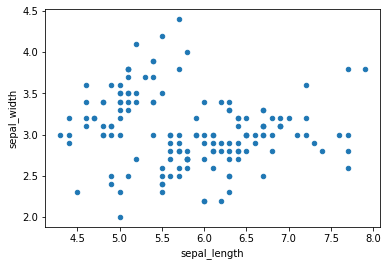

In [28]:
#Scatter plot of Sepal length with sepal width
df.plot(kind="scatter", x='sepal_length', y='sepal_width')

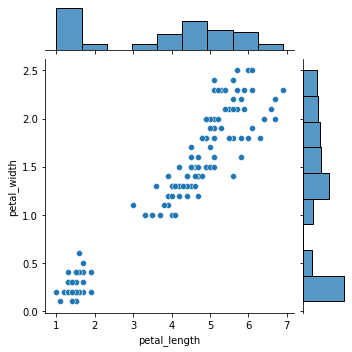

In [29]:
# Joint Plot to show scatterplot and univariate histograms
sns.jointplot(x="petal_length", y="petal_width", data=df, height=5)

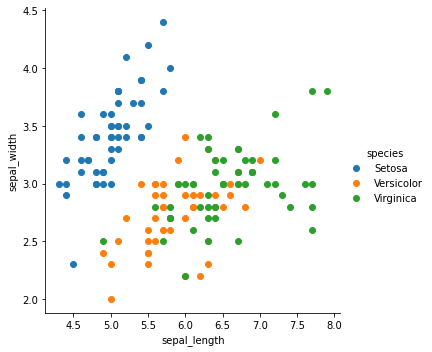

In [16]:
# Multidimensional plot of species with sepal length and sepal width
sns.FacetGrid(df, hue="species", height=5)\
.map(plt.scatter, "sepal_length", "sepal_width")\
.add_legend()

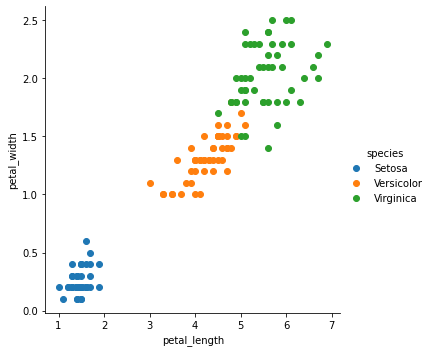

In [30]:
# Multidimensional plot of species with petal length and petal width
sns.FacetGrid(df, hue="species", height=5)\
.map(plt.scatter, "petal_length", "petal_width")\
.add_legend()

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

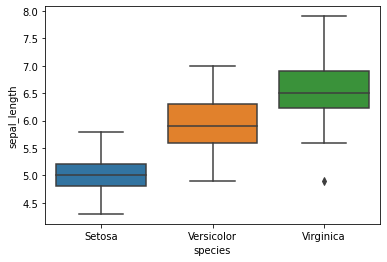

In [19]:
#Boxplot of sepal length
sns.boxplot(x="species", y="sepal_length", data=df)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

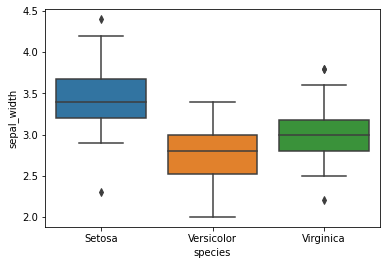

In [31]:
#Boxplot of sepal_width
sns.boxplot(x="species", y="sepal_width", data=df)

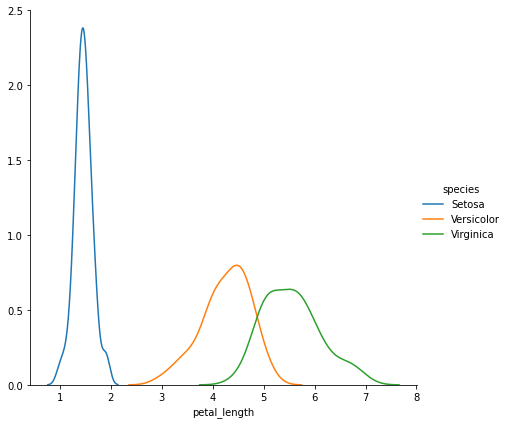

In [32]:
#Kernal density plot of Petal length
sns.FacetGrid(df, hue="species", height=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

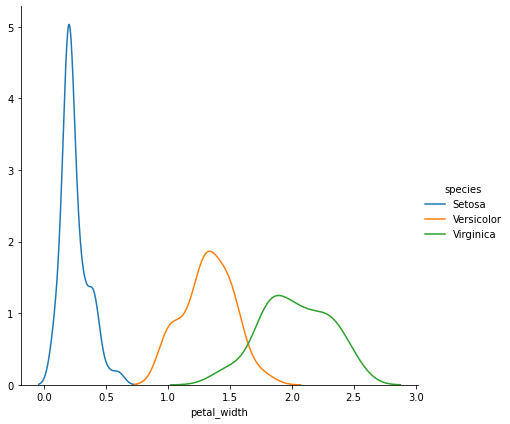

In [33]:
#Kernal density plot of Petal width
sns.FacetGrid(df, hue="species", height=6) \
   .map(sns.kdeplot, "petal_width") \
   .add_legend()

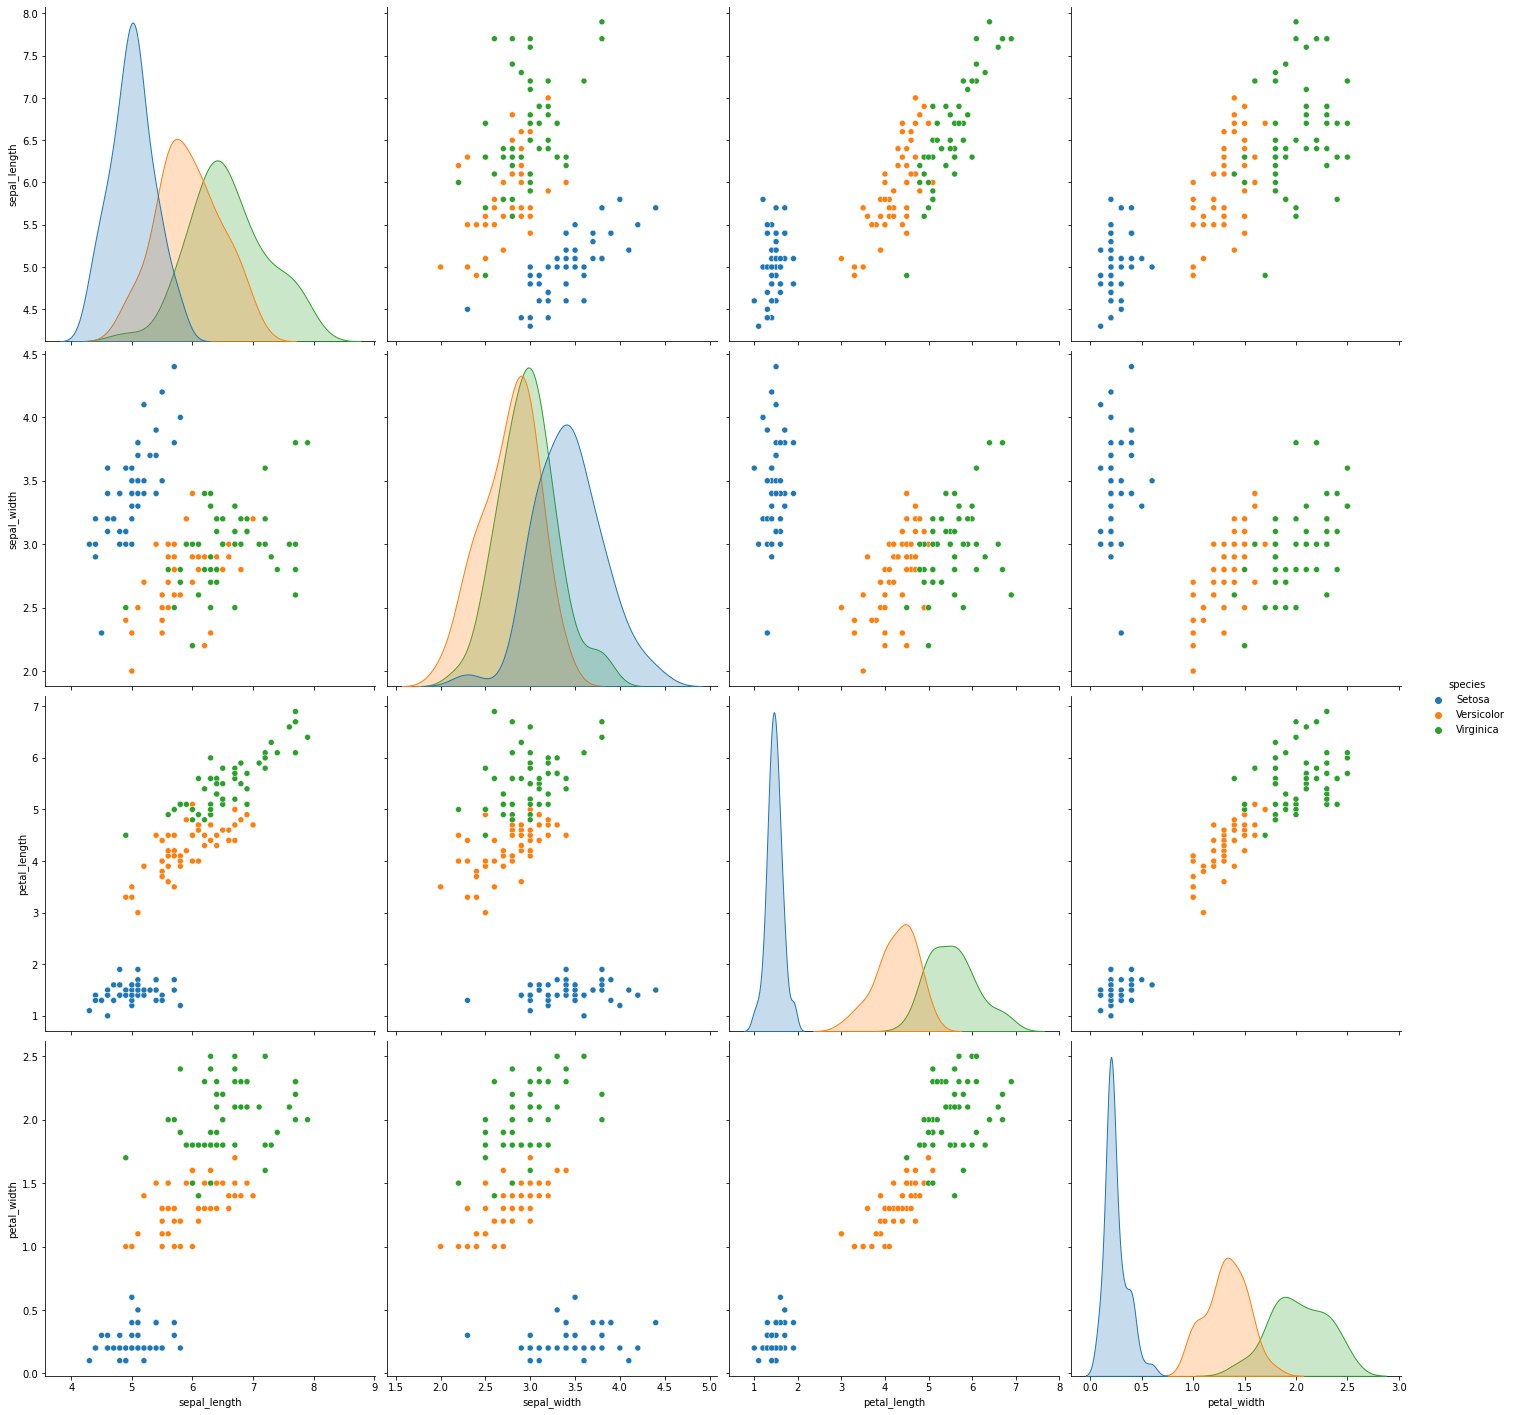

In [37]:
#All above plots in one plot
sns.pairplot(df, hue="species", height=5)

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

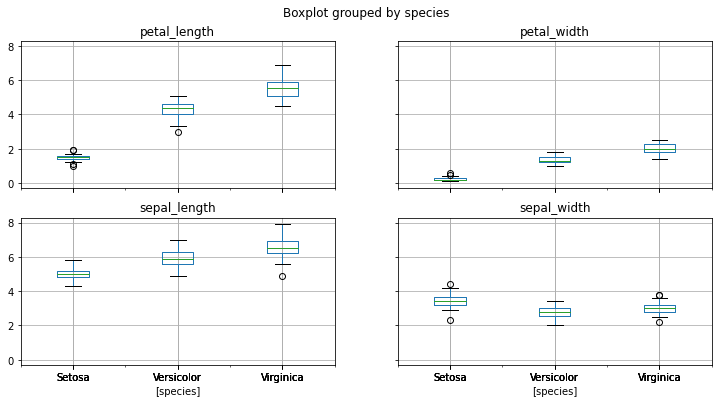

In [39]:
# Boxplots of the Iris Dataset
df.boxplot(by="species", figsize=(12, 6))

## Modeling

In [40]:
X = df.iloc[:,:3]
Y = df["species"]

In [41]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=11)

In [43]:
#Applying KNeighbors
from sklearn import neighbors
from sklearn.metrics import accuracy_score

knn_model = neighbors.KNeighborsClassifier() 
knn_model.fit(x_train,y_train)  # Model fitting

pred_knn = knn_model.predict(x_test) # Predicting species for test data

# Calculating Accuracy
print("KNeighbors Accuracy :",accuracy_score(y_test,pred_knn))

KNeighbors Accuracy : 0.9736842105263158


Kneighbors have gave high accuracy of 97.36% on test data.